# Frame Classification using ResNet + LSTM

- Create the LSTM model
- Cross validate the model using different hyperparameters configurations
- Train the best model
- Evaluate the best model within the testing videos

In [1]:
from utils import *
import os

/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-30 08:35:22,835	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-10-30 08:35:22,872	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Create the hyperparameters search space

Define the hyperparameters we want to check. 

In [ ]:
config = {
    'abs_path': '/home/sara/code/ratolins/code/', # project path 
    #'abs_path': 'wsl.localhost\Ubuntu\home\sara\code\ratolins\code',
    'sequence_length': [300, 600], 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': [1, 2, 3],
    'num_units': [64, 128],
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': [8, 16],
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'reuse_actors' : False
}

## Perform the Grid Search

In [ ]:
import ray
import os

os.environ['RAY_DISABLE_MEMORY_MONITOR']='0'
os.environ['RAY_DEDUP_LOGS']='0'
os.environ['RAY_MEMORY_USAGE_THRESHOLD']='0.99'
os.environ['RAY_memory_monitor_refresh_ms']='0'
os.environ['LD_LIBRARY_PATH']='./miniconda3/envs/tfgpu/lib/libtinfo.so'

ray.init(num_gpus=1, object_store_memory=int(1e9)) # Limit the object store to use 1GB of the RAM
ray.cluster_resources()

In [ ]:
#ray.remote(num_gpus=1)


In [ ]:
#ray.get_gpu_ids()

In [ ]:
ray.shutdown()
#ray.init(num_gpus=1)

In [ ]:
best_config = grid_search(config)

In [2]:
best_config = {
    'abs_path': '/Users/saraalbarran/Jupyterfiles/Uni/ratolins/code2/', # project path 
    'sequence_length': 1650, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 3,
    'num_units': 64,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 8,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
}

## Final model Training & Evaluation

(48, 1650, 2048) (48, 1650, 3)
(20, 1650, 2048) (20, 1650, 3)
Running experiment for Grooming

Epoch 1: accuracy improved from -inf to 0.74912, saving model to resnet_lstm_accuracy_grooming.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.74912 to 0.87830, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 3: accuracy improved from 0.87830 to 0.89515, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 4: accuracy improved from 0.89515 to 0.92128, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 5: accuracy improved from 0.92128 to 0.93250, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 6: accuracy improved from 0.93250 to 0.94152, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 7: accuracy did not improve from 0.94152

Epoch 8: accuracy improved from 0.94152 to 0.94236, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 9: accuracy improved from 0.94236 to 0.94812, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 10: accuracy did not improve from 0.94812

Epoch 11: accuracy did not improve from 0.94812

Epoch 12: accuracy improved from 0.94812 to 0.95703, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 13: accuracy did not improve f

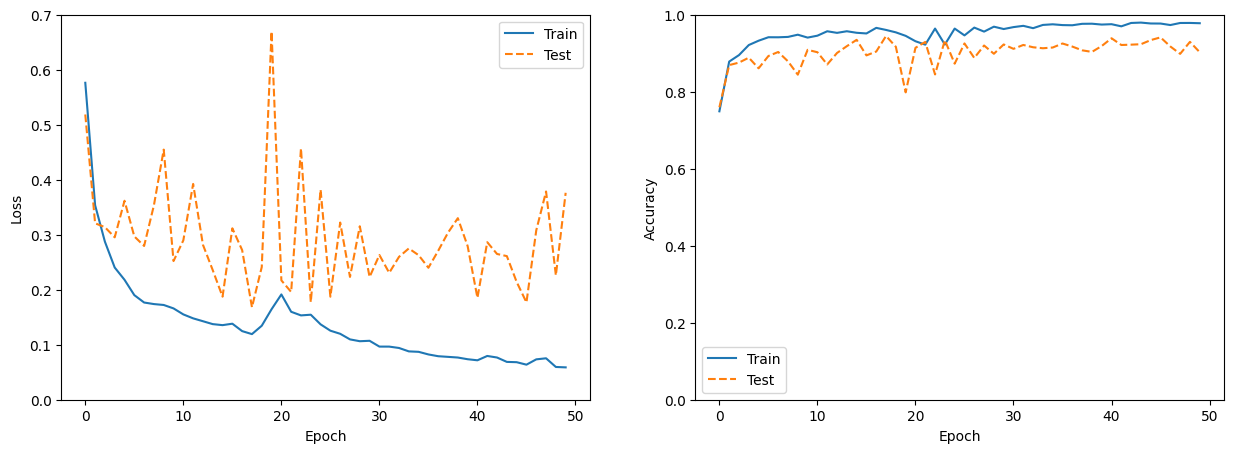

3/3 [==============================] - 1s 266ms/step


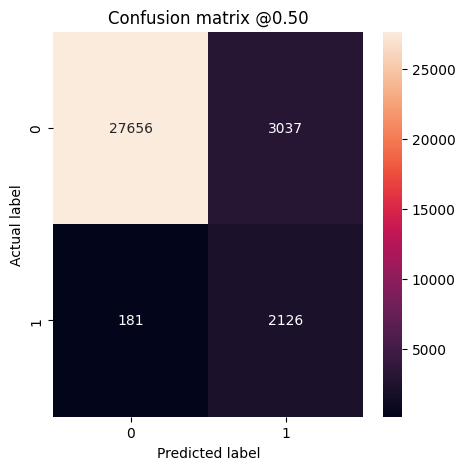

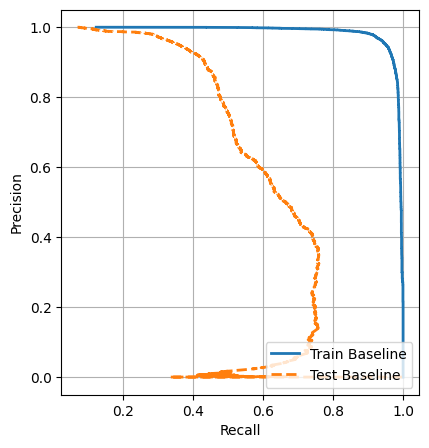

Running experiment for Mid Rearing


/Users/saraalbarran/Jupyterfiles/Uni/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils.py:356: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([



Epoch 1: accuracy improved from -inf to 0.82851, saving model to resnet_lstm_accuracy_mid_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy did not improve from 0.82851

Epoch 3: accuracy did not improve from 0.82851

Epoch 4: accuracy did not improve from 0.82851

Epoch 5: accuracy did not improve from 0.82851

Epoch 6: accuracy did not improve from 0.82851

Epoch 7: accuracy did not improve from 0.82851

Epoch 8: accuracy did not improve from 0.82851

Epoch 9: accuracy did not improve from 0.82851

Epoch 10: accuracy did not improve from 0.82851

Epoch 11: accuracy improved from 0.82851 to 0.84530, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 12: accuracy did not improve from 0.84530

Epoch 13: accuracy did not improve from 0.84530

Epoch 14: accuracy did not improve from 0.84530

Epoch 15: accuracy did not improve from 0.84530

Epoch 16: accuracy improved from 0.84530 to 0.87457, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 17: accuracy did not improve from 0.87457

Epoch 18: accuracy did not improve from 0.87457

Epoch 19: accuracy did not improve from 0.87457

Epoch 20: a

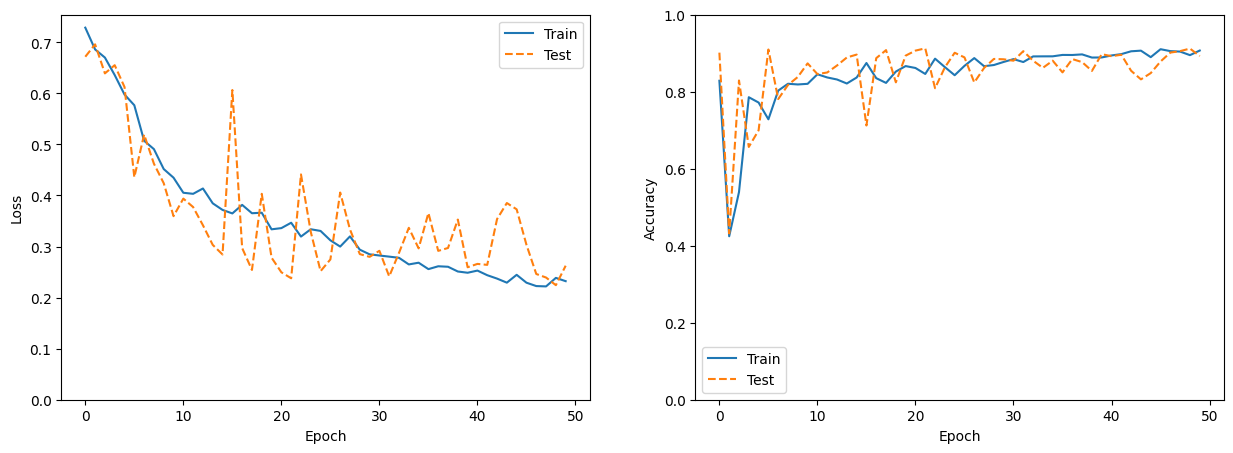

3/3 [==============================] - 1s 259ms/step


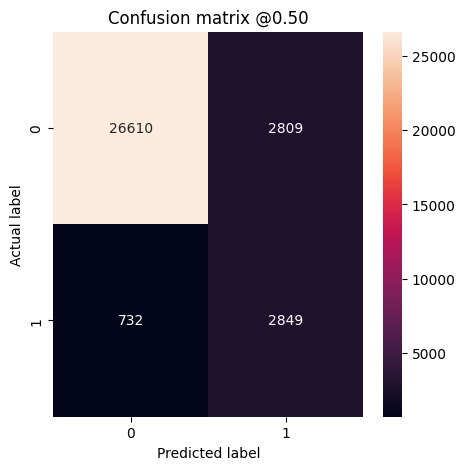

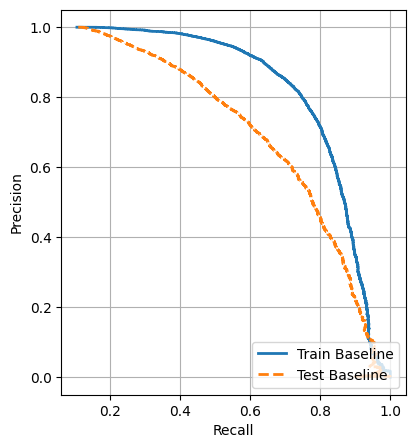

Running experiment for Wall Rearing

Epoch 1: accuracy improved from -inf to 0.63407, saving model to resnet_lstm_accuracy_wall_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.63407 to 0.74835, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 3: accuracy improved from 0.74835 to 0.78691, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 4: accuracy improved from 0.78691 to 0.82941, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 5: accuracy improved from 0.82941 to 0.86381, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 6: accuracy did not improve from 0.86381

Epoch 7: accuracy improved from 0.86381 to 0.87638, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 8: accuracy improved from 0.87638 to 0.88328, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 9: accuracy did not improve from 0.88328

Epoch 10: accuracy did not improve from 0.88328

Epoch 11: accuracy improved from 0.88328 to 0.89723, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 12: accuracy improved from 0.89723 to 0.90716, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoc

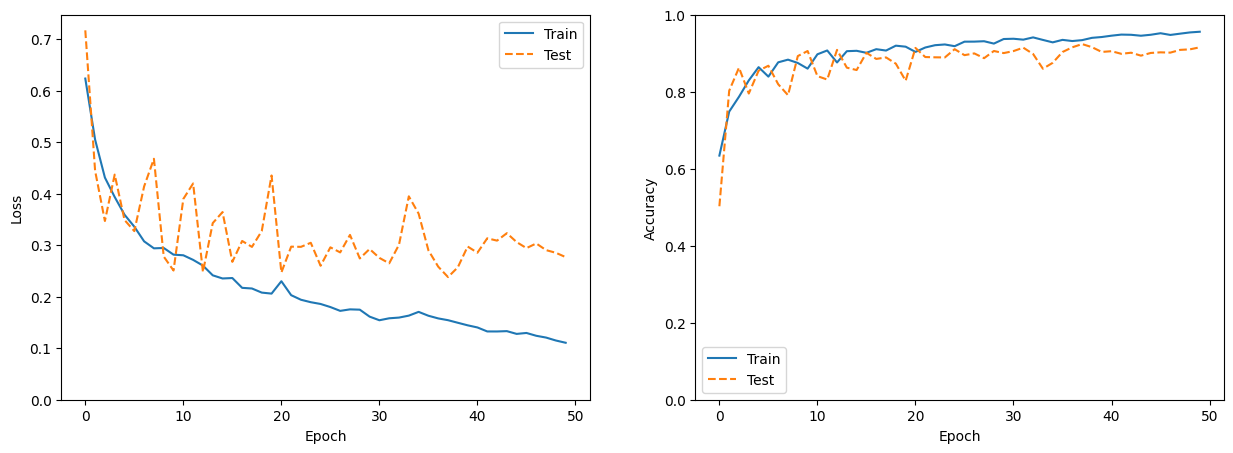

3/3 [==============================] - 1s 261ms/step


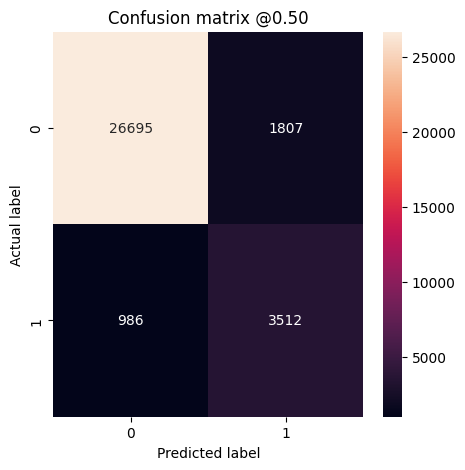

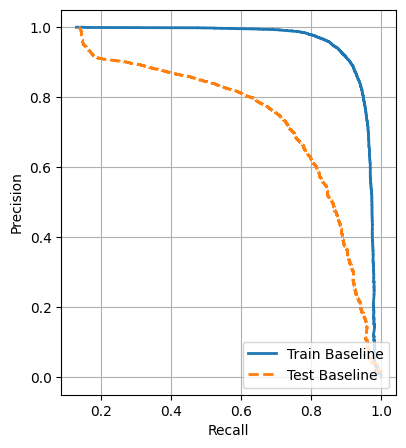

In [3]:
metrics = train_test_model(best_config)

(264, 300, 2048) (264, 300, 3)
(110, 300, 2048) (110, 300, 3)
Running experiment for Grooming

Epoch 1: accuracy improved from -inf to 0.87621, saving model to resnet_lstm_accuracy_grooming.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.87621 to 0.90453, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 3: accuracy improved from 0.90453 to 0.92491, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 4: accuracy improved from 0.92491 to 0.92638, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 5: accuracy did not improve from 0.92638

Epoch 6: accuracy improved from 0.92638 to 0.94551, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 7: accuracy did not improve from 0.94551

Epoch 8: accuracy did not improve from 0.94551

Epoch 9: accuracy did not improve from 0.94551

Epoch 10: accuracy did not improve from 0.94551

Epoch 11: accuracy improved from 0.94551 to 0.95226, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 12: accuracy improved from 0.95226 to 0.95461, saving model to resnet_lstm_accuracy_grooming.h5

Epoch 13: accuracy did not improve from 0.95461

Epoch 14: accuracy did not improve from 0.95461

Epoch 15: accuracy improved from 0.95461 to 0.

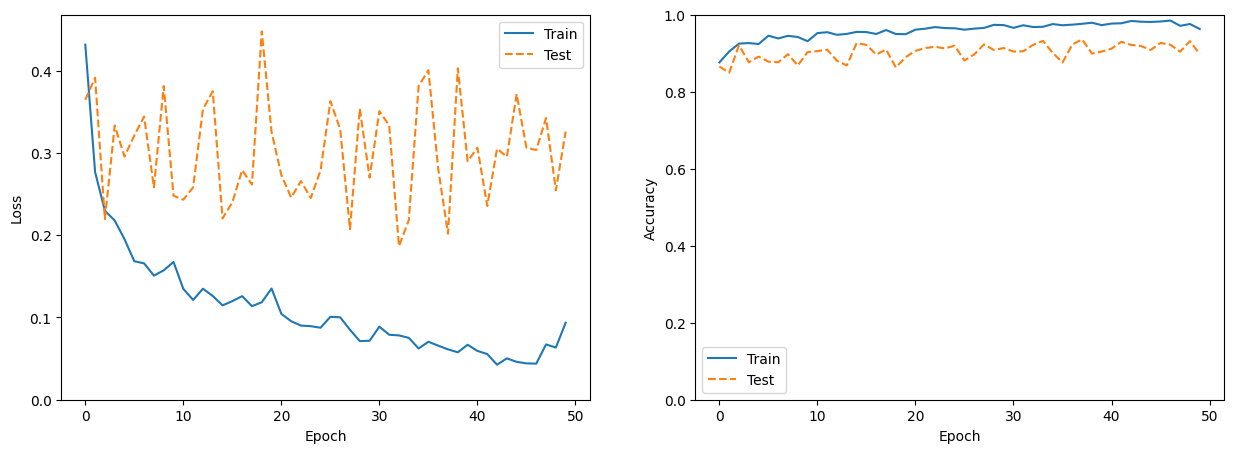

14/14 [==============================] - 2s 55ms/step


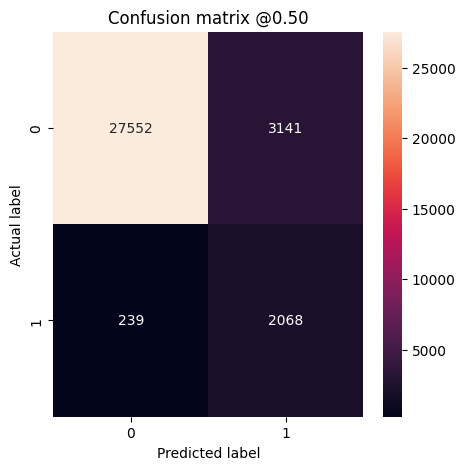

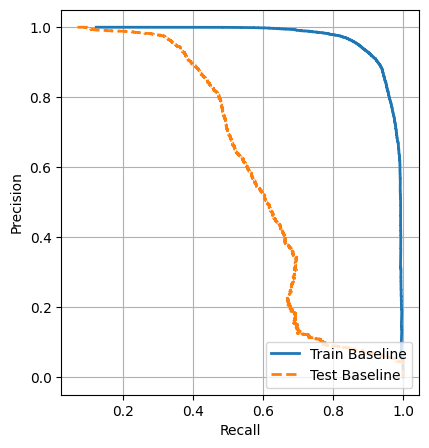

Running experiment for Mid Rearing


/Users/saraalbarran/Jupyterfiles/Uni/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils.py:356: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([



Epoch 1: accuracy improved from -inf to 0.62096, saving model to resnet_lstm_accuracy_mid_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.62096 to 0.79801, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 3: accuracy improved from 0.79801 to 0.80486, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 4: accuracy improved from 0.80486 to 0.83231, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 5: accuracy improved from 0.83231 to 0.84609, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 6: accuracy did not improve from 0.84609

Epoch 7: accuracy improved from 0.84609 to 0.85434, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 8: accuracy improved from 0.85434 to 0.85549, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 9: accuracy improved from 0.85549 to 0.86602, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 10: accuracy improved from 0.86602 to 0.86606, saving model to resnet_lstm_accuracy_mid_rearing.h5

Epoch 11: accuracy did not improve from 0.86606

Epoch 12: accuracy improved from 0.86606 to 0.87607, saving m

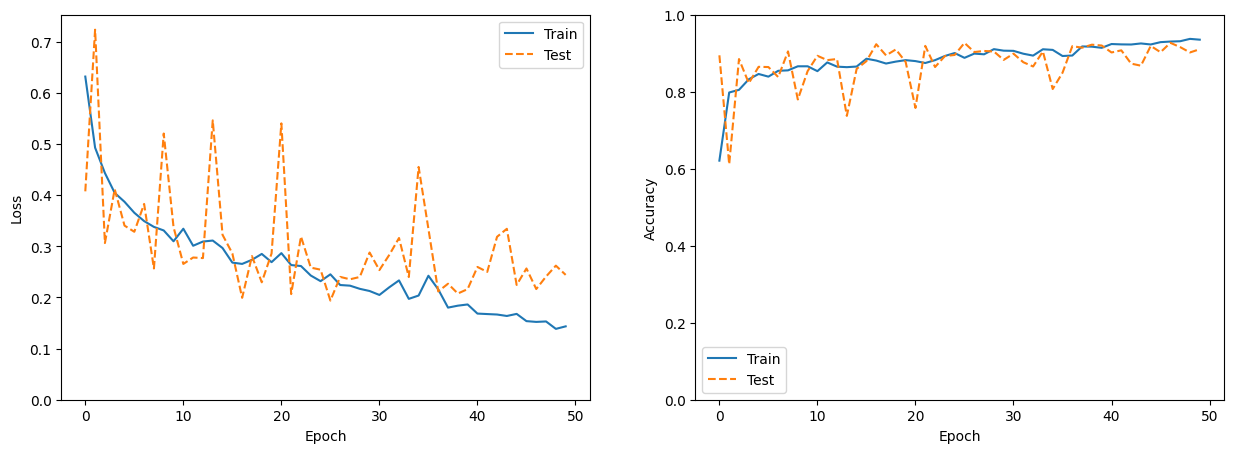

14/14 [==============================] - 1s 54ms/step


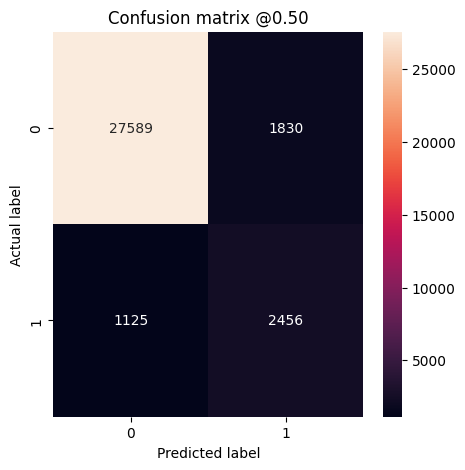

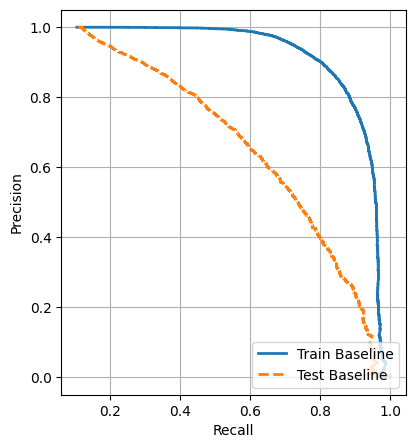

Running experiment for Wall Rearing

Epoch 1: accuracy improved from -inf to 0.76199, saving model to resnet_lstm_accuracy_wall_rearing.h5


/Users/saraalbarran/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.76199 to 0.85277, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 3: accuracy improved from 0.85277 to 0.87716, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 4: accuracy improved from 0.87716 to 0.88878, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 5: accuracy improved from 0.88878 to 0.89854, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 6: accuracy improved from 0.89854 to 0.90168, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 7: accuracy improved from 0.90168 to 0.90513, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 8: accuracy did not improve from 0.90513

Epoch 9: accuracy did not improve from 0.90513

Epoch 10: accuracy improved from 0.90513 to 0.90760, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 11: accuracy improved from 0.90760 to 0.91606, saving model to resnet_lstm_accuracy_wall_rearing.h5

Epoch 12: accuracy did not improve from 0.91606

Epoc

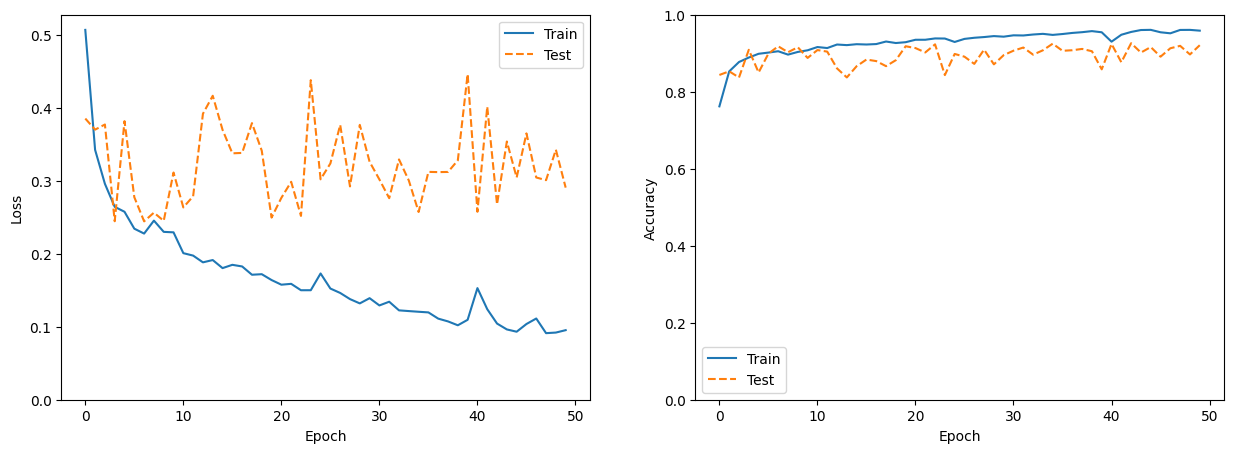

14/14 [==============================] - 1s 53ms/step


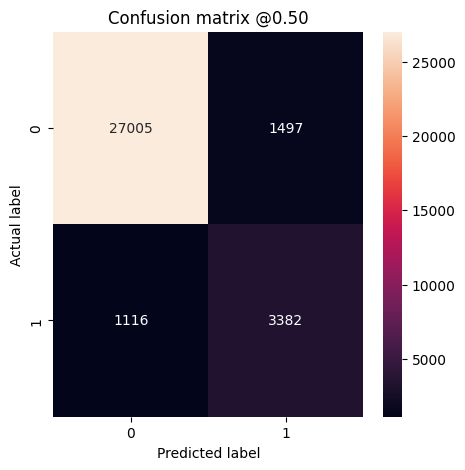

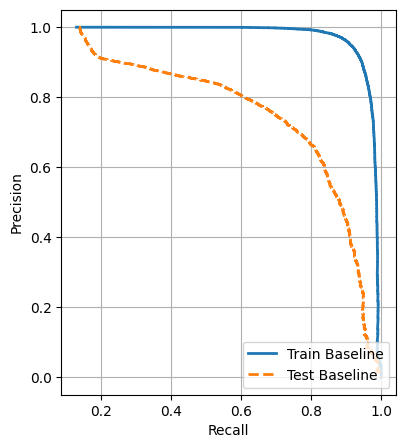

In [4]:
best_config = {
    'abs_path': '/Users/saraalbarran/Jupyterfiles/Uni/ratolins/code2/', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 3,
    'num_units': 64,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 8,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
}

metrics = train_test_model(best_config)